Была поставлена следующая задача:
Спрогнозировать вернется ли студент к ИИ-помошнику на основе имеющихся данных

Для начала был произведен первоначальный анализ данных

Импорт библиотек:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

Достаем данные и смотрим первые строки.
Также получаем основную информацию о датасете и стандартную статистическую информацию по числовым факторам.

In [2]:
df = pd.read_csv('../data/ai_assistant_usage_student_life.csv', parse_dates=True)
display(df.head())
df.info()
df.describe()
df.duplicated().sum()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


np.int64(0)

Как можно заметить мы располагаем 4 числовыми факторами, 1 булевым и 6 строковых, а также среди нет дубликатов и пропусков (если бы они были, то пришлось бы посмотреть на строки с пропущенными данными, их проанализировать и решить что с ними делать (например заполнить средним или иным значением или удалить)).

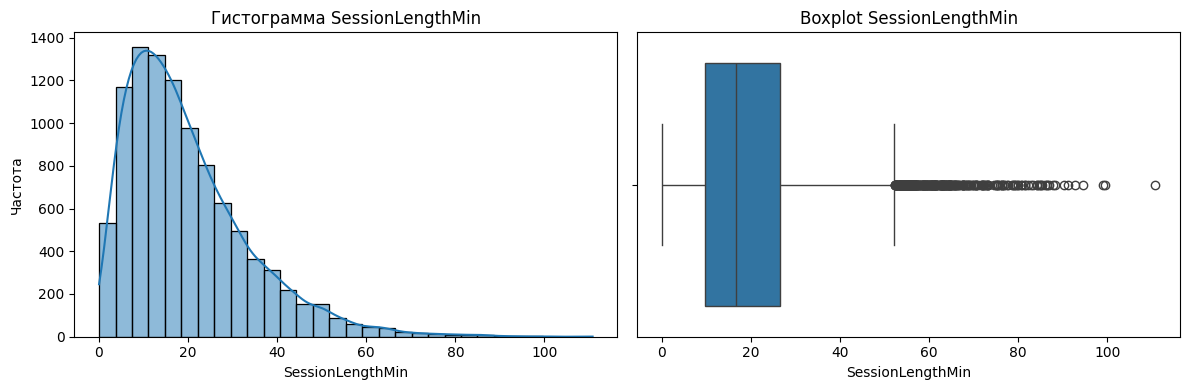

Количество выбросов: 302
Процент от всех данных: 3.02


In [3]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1) 
sb.histplot(df['SessionLengthMin'], bins=30, kde=True)
plt.title('Гистограмма SessionLengthMin')
plt.xlabel('SessionLengthMin')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sb.boxplot(x=df['SessionLengthMin'])
plt.title('Boxplot SessionLengthMin')
plt.xlabel('SessionLengthMin')

plt.tight_layout()
plt.show()

Q1 = df['SessionLengthMin'].quantile(0.25)
Q3 = df['SessionLengthMin'].quantile(0.75)
IQR_SLM = Q3 - Q1
upper_bound_SLM = Q3 + 1.5 * IQR_SLM
outliers_SLM = df[df['SessionLengthMin'] > upper_bound_SLM]
outliers_count = len(outliers_SLM)

print(f"Количество выбросов: {outliers_count}")
print(f"Процент от всех данных: {(outliers_count/10000)*100}")

Как можно увидеть у фактора SessionLengthMin много аномальных значений, которые выпадают за правый "ус" (больше Q3 + IQR*1,5), что говорит о том что это могут быть выбросы

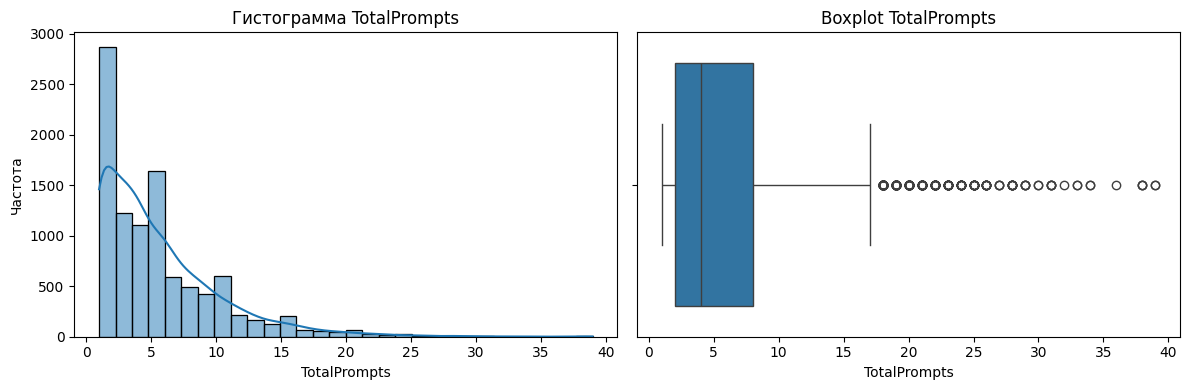

Количество выбросов: 265
Процент от всех данных: 2.65


In [4]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1) 
sb.histplot(df['TotalPrompts'], bins=30, kde=True)
plt.title('Гистограмма TotalPrompts')
plt.xlabel('TotalPrompts')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sb.boxplot(x=df['TotalPrompts'])
plt.title('Boxplot TotalPrompts')
plt.xlabel('TotalPrompts')

plt.tight_layout()
plt.show()

Q1 = df['TotalPrompts'].quantile(0.25)
Q3 = df['TotalPrompts'].quantile(0.75)
IQR_TP = Q3 - Q1
upper_bound_TP = Q3 + 1.5 * IQR_TP
outliers_TP = df[df['TotalPrompts'] > upper_bound_TP]
outliers_count = len(outliers_TP)

print(f"Количество выбросов: {outliers_count}")
print(f"Процент от всех данных: {(outliers_count/10000)*100}")

TotalPrompts также имеет несколько аномальных значений

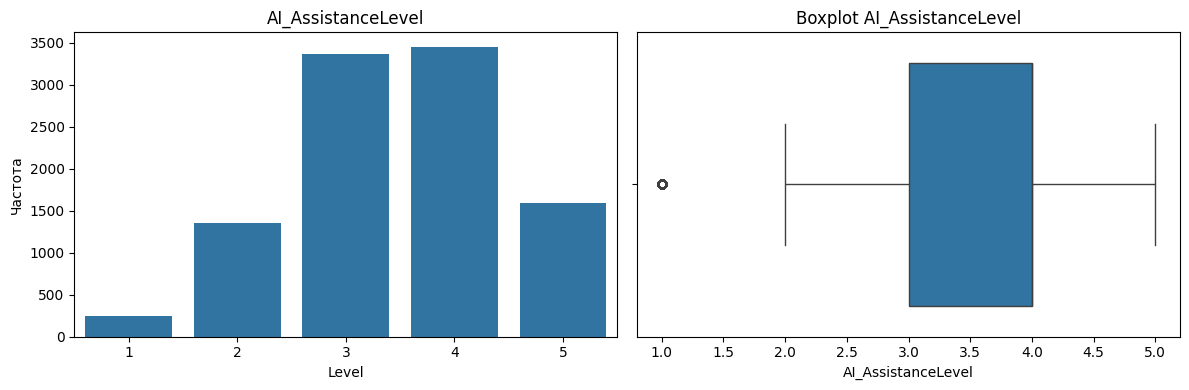

In [5]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1) 
sb.countplot(x=df['AI_AssistanceLevel'], order=range(1, 6))  
plt.title('AI_AssistanceLevel')
plt.xlabel('Level')
plt.ylabel('Частота')
plt.xticks(ticks=[0,1,2,3,4], labels=['1', '2', '3', '4', '5']) 

plt.subplot(1, 2, 2)
sb.boxplot(x=df['AI_AssistanceLevel'])
plt.title('Boxplot AI_AssistanceLevel')
plt.xlabel('AI_AssistanceLevel')

plt.tight_layout()
plt.show()

Как можно заметить AI_AssistanceLevel = 1 намного меньше чем других оценок, что скорее всего нормально, в контексте этих данных

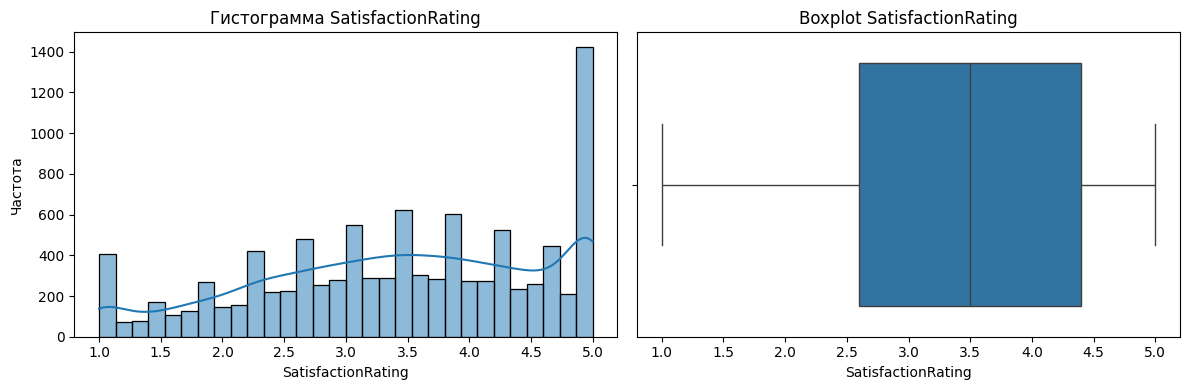

In [6]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1) 
sb.histplot(df['SatisfactionRating'], bins=30, kde=True)
plt.title('Гистограмма SatisfactionRating')
plt.xlabel('SatisfactionRating')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sb.boxplot(x=df['SatisfactionRating'])
plt.title('Boxplot SatisfactionRating')
plt.xlabel('SatisfactionRating')

plt.tight_layout()
plt.show()


Визуализация SatisfactionRating. данные выглядят нормальными, Boxplot не указывает на наличие аномальных значений

Теперь посмотрим на остальные данные. для этого отобразим распределение их значений в виде круговой диаграммы

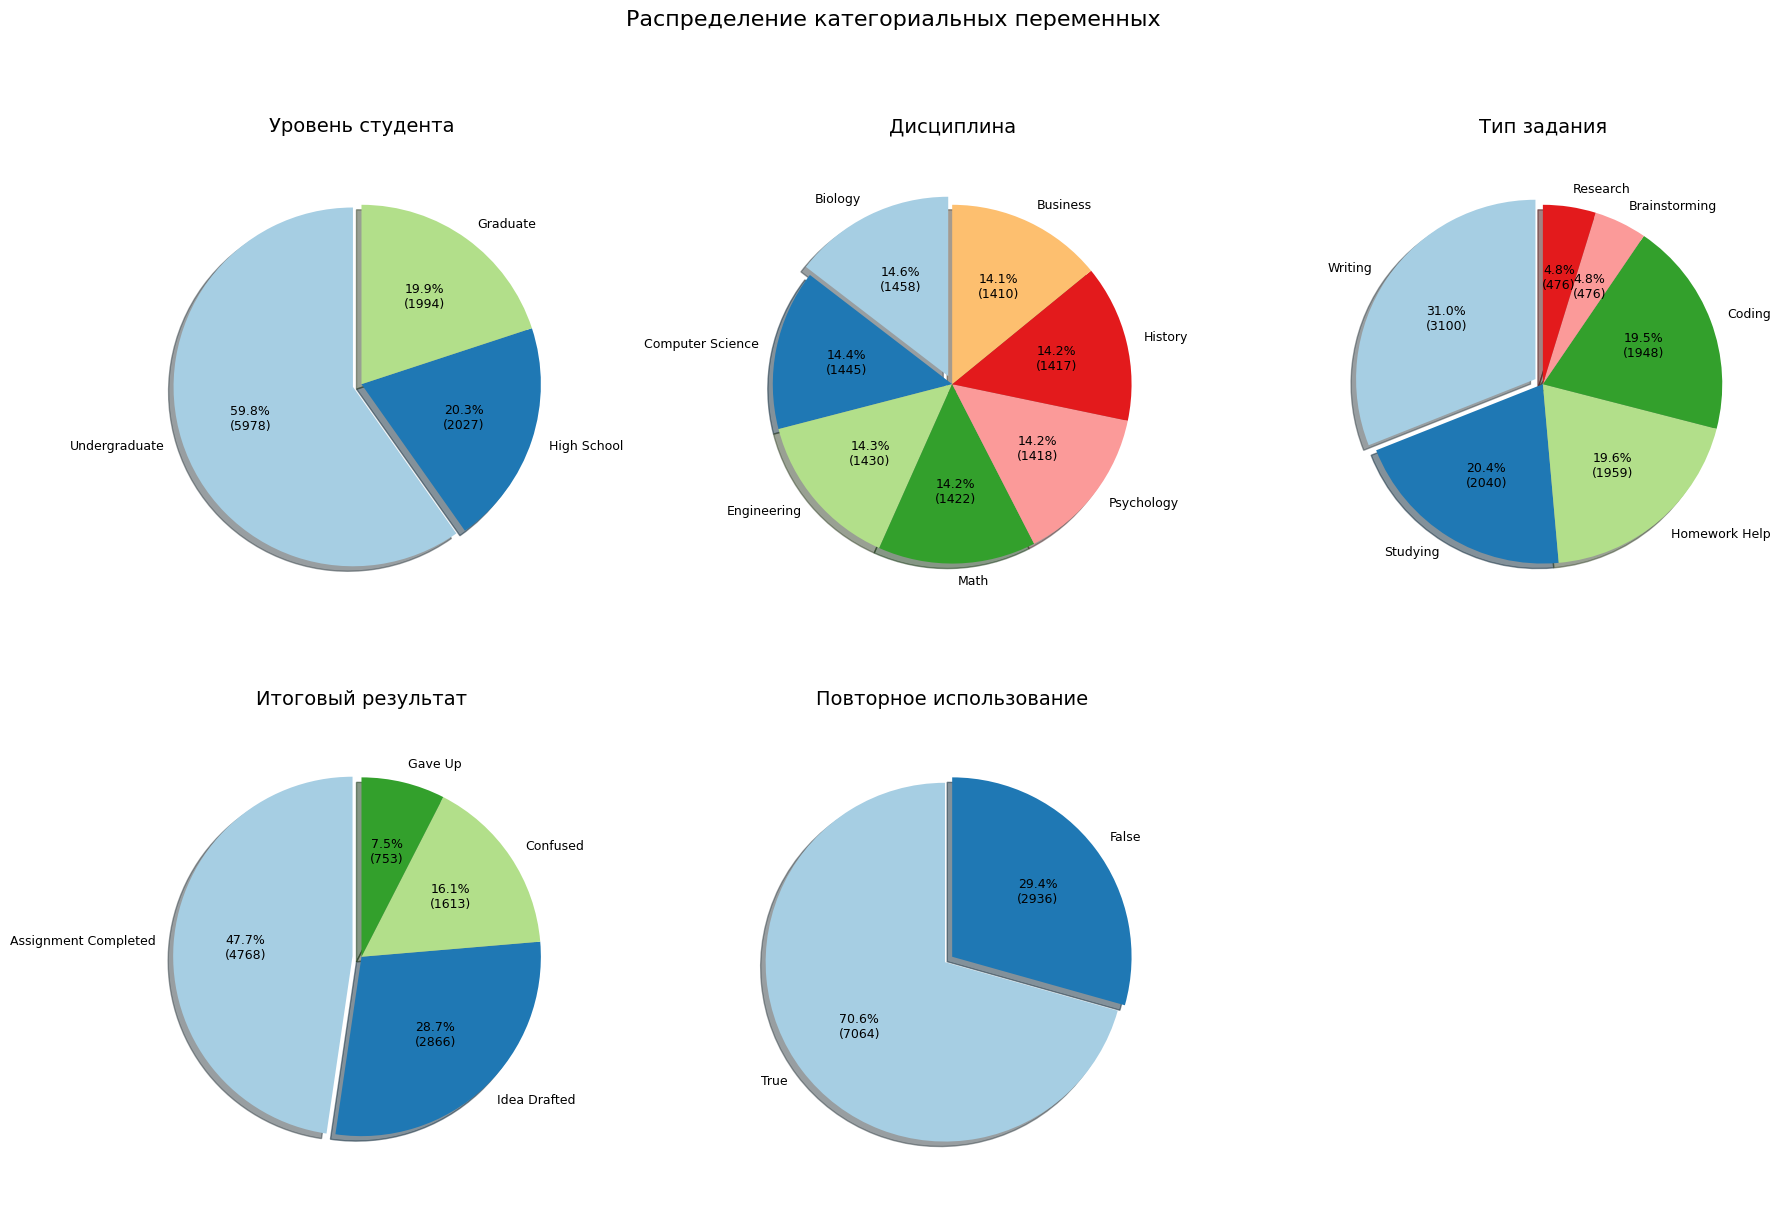

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Распределение категориальных переменных', fontsize=16, y=1.02)

variables = [
    ('StudentLevel', 'Уровень студента'),
    ('Discipline', 'Дисциплина'),
    ('TaskType', 'Тип задания'),
    ('FinalOutcome', 'Итоговый результат'),
    ('UsedAgain', 'Повторное использование'),
    (None, None)  
]

colors = plt.cm.Paired.colors

for idx, (var, title) in enumerate(variables):
    ax = axes[idx//3, idx%3]
    
    if var is None:
        ax.axis('off')
        continue
        
    counts = df[var].value_counts()
    ax.pie(
        counts,
        labels=counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(counts)/100)})',
        startangle=90,
        explode=tuple([0.05 if i == 0 else 0 for i in range(len(counts))]),
        shadow=True,
        textprops={'fontsize': 9},
        colors=colors[:len(counts)]
    )
    ax.set_title(title, fontsize=14, pad=20)

plt.tight_layout()
plt.show()

как мы можем увидеть около 60% учащихся это студенты бакалавриата\специалитета, другие в почти равной пропорции это студенты магистратуры\аспирантуры и школьники.



Распределение по области обучения равномерное.
По типу задачи можно выделить то что большенство задач которые решались с помощью ИИ-помошников это задачи на написание текста (31%); и малая доля это исследование (4,8%) и брейншторм (4,8%).


47,7% задач были выполнены, для 28,7% была составлена идея\план выполнения, 16,1% были скомфужены ответами ИИ, 7,5% сдались (ИИ-помошник не смог никак помочь).


70,6% учащихся воспользовались помошником повторно, остальные нет. 

Вернемся к числовым и булевой переменной, постоим хитмап чтобы отобразить матрицу корреляций.

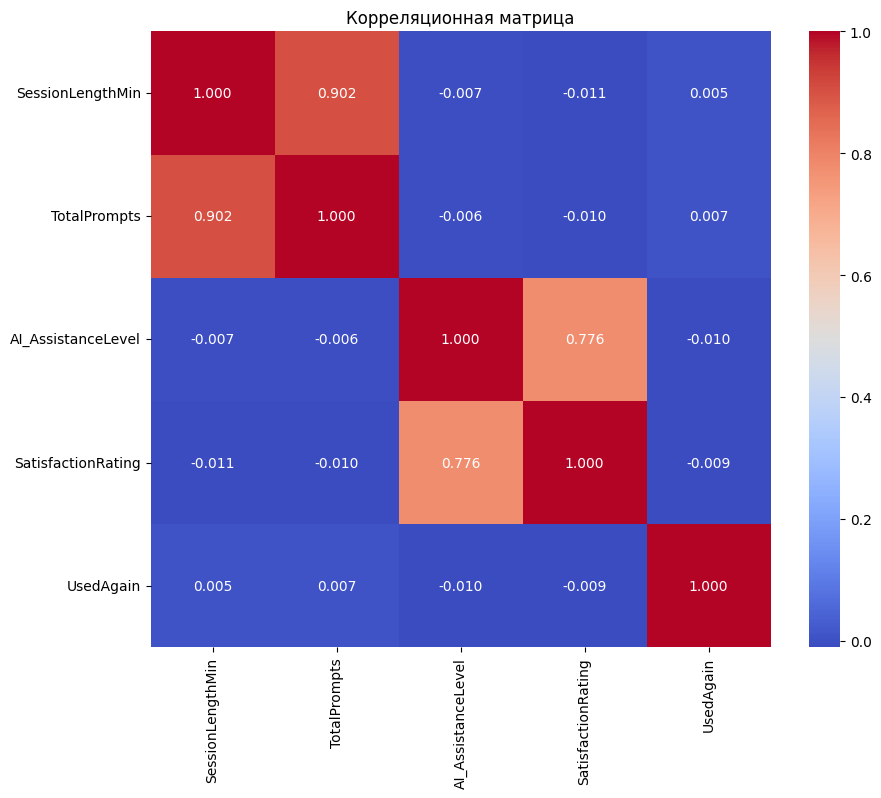

In [8]:
#sb.pairplot(df[['SessionLengthMin',	'TotalPrompts',	'AI_AssistanceLevel',	'SatisfactionRating']].dropna())
#plt.show()
df_UA = df
df_UA['UsedAgain'] = df_UA['UsedAgain'].astype(int)
#print(df_UA)
corr = df_UA[['SessionLengthMin',	'TotalPrompts',	'AI_AssistanceLevel',	'SatisfactionRating', 'UsedAgain']].corr()
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Как можно заметить время сессии сильно коррелирует с количеством промптов, что довольно очевидно. Также AI_AssistanceLevel и SatisfactionRating тоже сильно коррелируют, что тоже ожидаемо, возможно даже стоит исключить из датасета одну из тих переменных. Менее ожидаемо отсутствие корреляции с UsedAgain AI_AssistanceLevel и SatisfactionRating, но возможно корреляция есть, но она не линейная или проблема в данных (одна переменная булевая, другая числовая)

In [9]:
from scipy.stats import pointbiserialr

r, p_value = pointbiserialr(
    df_UA['AI_AssistanceLevel'], 
    df_UA['UsedAgain']
)
print(f"Корреляция: {r:.3f}, p-value: {p_value:.4f}")

from scipy.stats import ttest_ind

group_yes = df_UA[df_UA['UsedAgain'] == 1]['AI_AssistanceLevel']
group_no = df_UA[df_UA['UsedAgain'] == 0]['AI_AssistanceLevel']

t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p_val:.4f}")  

Корреляция: -0.010, p-value: 0.3171
p-value: 0.3171


проверив связь AI_AssistanceLevel и UsedAgain с помощью Point-Biserial Correlation и t-теста, замечаем что признаки не коррелируют друг с другом, однако все еще может быть связь иного рода, это уже будет проверено в следующем ноутбуке.

Далее вернемся к выбросам, а конкретно к аномальным значениям во Времени Сессии и Количеством Промптов. Проанализируем срез данных с выбросами по времени сессии, так как там больше всего выбросов.

144


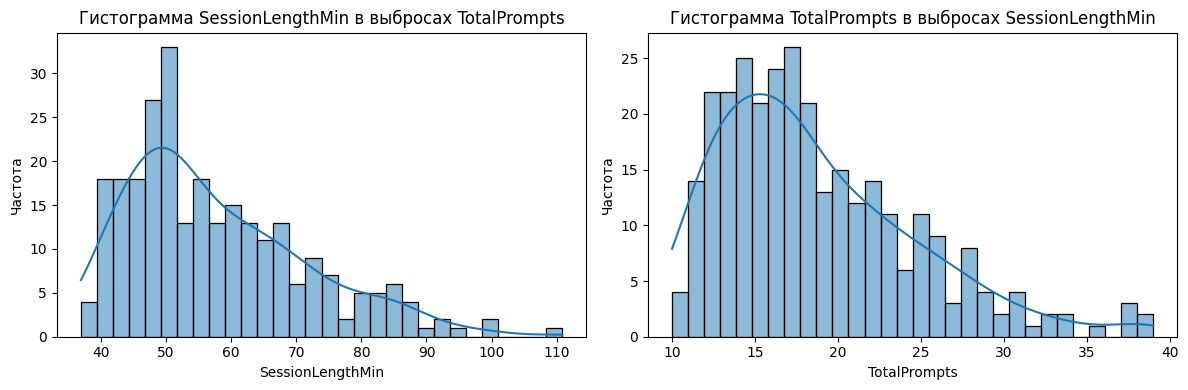

In [10]:
#print(outliers_SLM)

outliers_TPinSLM = outliers_SLM[outliers_SLM['TotalPrompts'] > upper_bound_TP]
print(len(outliers_TPinSLM))

plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1) 
sb.histplot(outliers_TP['SessionLengthMin'], bins=30, kde=True)
plt.title('Гистограмма SessionLengthMin в выбросах TotalPrompts')
plt.xlabel('SessionLengthMin')
plt.ylabel('Частота')

plt.subplot(1, 2, 2) 
sb.histplot(outliers_SLM['TotalPrompts'], bins=30, kde=True)
plt.title('Гистограмма TotalPrompts в выбросах SessionLengthMin')
plt.xlabel('TotalPrompts')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Учитывая сильную корреляцию вообще между этими двумя факторами и то что большая доля выбросов TotalPrompts является и выбросами в SessionLengthMin и общая их доля врятли привышает 5%, то можно оставить эти выбросы и возможно в будущем анализе применить устойчивые к ним инструменты.